In [4]:
import os, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
plt.rc('font', family = 'serif', size = 13, weight = "bold")
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('axes', linewidth = 2)
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize = (6, 6))
plt.rc('legend', fontsize = 13)

cm = plt.cm.get_cmap('tab20')

if not os.path.exists('Plots'):
    os.makedirs('Plots')

---

### (200) 100nM Threshold
---

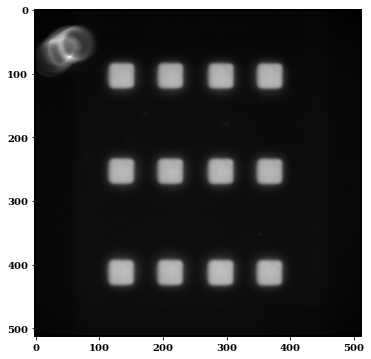

In [6]:
filenames = sorted(["1 Genelet Pattern and Wash/" + i\
                    for i in os.listdir("1 Genelet Pattern and Wash") if "_200nMThresh_200nMG1-t_Cy3" in i])

filename = filenames[0]
img = plt.imread(filename)
plt.imshow(img, cmap = "gray");

17459.78603284723


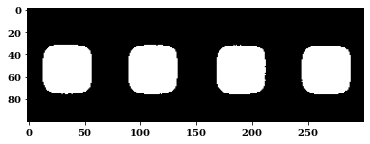

In [7]:
# CROP AND GET "SPIKED MAX"
plt.imshow(img[200:300, 100:400] > img.mean()+img.std(), cmap = "gray");

# "spike value for full repression"
cropped = img[200:300, 100:400]

max_ = np.mean(cropped[cropped > img.mean()+img.std()]) * 0.75
print(max_)

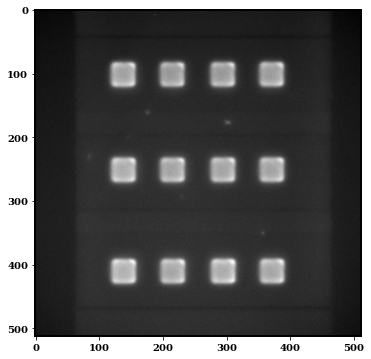

In [8]:
filenames = sorted(["3 RNA Trigger and RNaseH/" + i\
                    for i in os.listdir("3 RNA Trigger and RNaseH") if "_200nMThresh_Cy3" in i])
filename = filenames[-1]
img = plt.imread(filename)
plt.imshow(img, cmap = "gray")

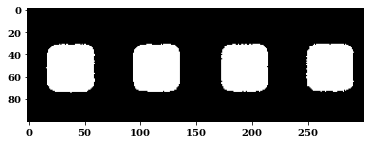

In [9]:
plt.imshow(img[50:150, 100:400] > img.mean()+img.std(), cmap = "gray") 
# 50:150, 100:400 | 200:300, 100:400 | 350:450, 100:400

In [10]:
data = np.zeros(shape = (len(filenames), 3))

for i in range(len(filenames)):
    
    filename = filenames[i]

    img = plt.imread(filename)
    
    img_extracted = img[50:150, 100:400] 

    data[int(filename.split("_")[-3]), 0] = img_extracted[img_extracted > img.mean()+img.std()].mean()
    
    img_extracted = img[200:300, 100:400] 
    
    data[int(filename.split("_")[-3]), 1] = img_extracted[img_extracted > img.mean()+img.std()].mean()
    
    img_extracted = img[350:450, 100:400] 
    
    data[int(filename.split("_")[-3]), 2] = img_extracted[img_extracted > img.mean()+img.std()].mean()

In [11]:
# extract 8hr data
data = data[:100, :]

# save raw
raw = pd.DataFrame(copy.deepcopy(data[:, :50]), columns=["100nM-1", "100nM-2", "100nM-3"])

for i in range(3):
    # if greater than "full repression value", fully repress
    if data[:, i].max() > max_:
        data[:, i] = 100 - 100 * (data[:, i] - data[:, i].min()) / (data[:, i].max() - data[:, i].min())
    else:
        data[:, i] = 100 - 100 * (data[:, i] - data[:, i].min()) / (max_ - data[:, i].min())

# save normalized
norm = pd.DataFrame(copy.deepcopy(data), columns=["100nM-1", "100nM-2", "100nM-3"])

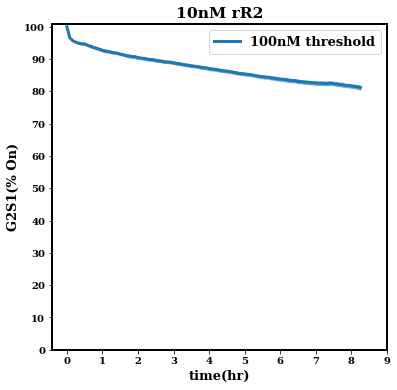

In [12]:
timestamps = np.arange(len(data))*5/60

plt.plot(timestamps, data.mean(axis = 1),\
                color = cm.colors[0], alpha = 1, label = "100nM threshold")

plt.fill_between(timestamps, data.mean(axis = 1), data.mean(axis = 1) - data.std(axis = 1),\
                color = cm.colors[0], alpha = .5)

plt.fill_between(timestamps, data.mean(axis = 1), data.mean(axis = 1) + data.std(axis = 1),\
                color = cm.colors[0], alpha = .5)

plt.legend()
plt.xlabel("time(hr)", weight = "bold", fontsize = 13)
plt.ylabel("G2S1(% On)", weight = "bold", fontsize = 13)
plt.title("10nM rR2", weight = "bold")
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,110,10))
plt.savefig('Plots/100nM Activity vs Time.png')
plt.show()

### (2000) 1000nM Threshold
---

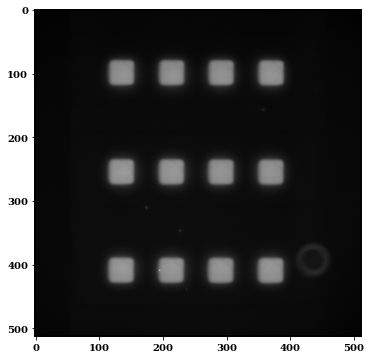

In [13]:
filenames = sorted(["1 Genelet Pattern and Wash/" + i\
                    for i in os.listdir("1 Genelet Pattern and Wash") if "_2000nMThresh_200nMG1-t_Cy3" in i])

filename = filenames[0]
img = plt.imread(filename)
plt.imshow(img, cmap = "gray");

15866.029900448684


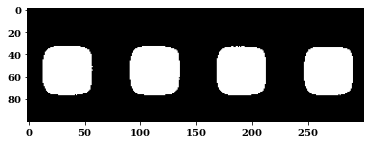

In [14]:
# CROP AND GET "SPIKED MAX"
plt.imshow(img[200:300, 100:400] > img.mean()+img.std(), cmap = "gray");

# "spike value for full repression"
cropped = img[200:300, 100:400]

max_ = np.mean(cropped[cropped > img.mean()+img.std()]) * 0.75
print(max_)

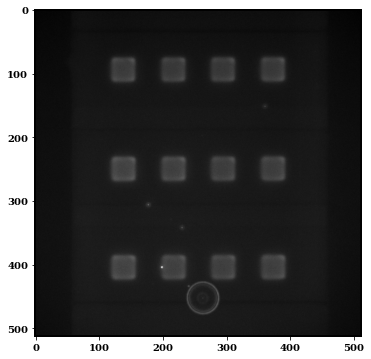

In [15]:
filenames = sorted(["3 RNA Trigger and RNaseH/" + i\
                    for i in os.listdir("3 RNA Trigger and RNaseH") if "_2000nMThresh_Cy3" in i])

filename = filenames[-1]
img = plt.imread(filename)
plt.imshow(img, cmap = "gray")

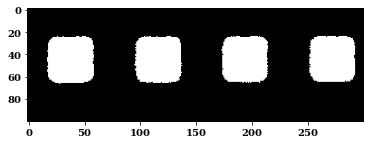

In [16]:
gel = img[50:150, 100:400] > img.mean()+img.std()
plt.imshow(gel, cmap = "gray") 

# 50:150, 100:400 | 200:300, 100:400 | 350:430, 100:400

In [17]:
data = np.zeros(shape = (len(filenames), 3))

for i in range(len(filenames)):
    
    filename = filenames[i]

    img = plt.imread(filename)
    
    img_extracted = img[50:150, 100:400] 

    data[int(filename.split("_")[-3]), 0] = img_extracted[img_extracted > img.mean()+img.std()].mean()
    
    img_extracted = img[200:300, 100:400] 
    
    data[int(filename.split("_")[-3]), 1] = img_extracted[img_extracted > img.mean()+img.std()].mean()
    
    img_extracted = img[350:430, 100:400] 
    
    data[int(filename.split("_")[-3]), 2] = img_extracted[img_extracted > img.mean()+img.std()].mean()

In [18]:
# extract 8hr data
data = data[:100, :]

# save raw
new_raw = pd.DataFrame(copy.deepcopy(data[:, :50]), columns=["1000nM-1", "1000nM-2", "1000nM-3"])

for i in range(3):
    # if greater than "full repression value", fully repress
    if data[:, i].max() > max_:
        data[:, i] = 100 - 100 * (data[:, i] - data[:, i].min()) / (data[:, i].max() - data[:, i].min())
    else:
        data[:, i] = 100 - 100 * (data[:, i] - data[:, i].min()) / (max_ - data[:, i].min())

# save normalized
new_norm = pd.DataFrame(copy.deepcopy(data), columns=["1000nM-1", "1000nM-2", "1000nM-3"])

raw = pd.concat((raw, new_raw), axis = 1)
norm = pd.concat((norm, new_norm), axis = 1)

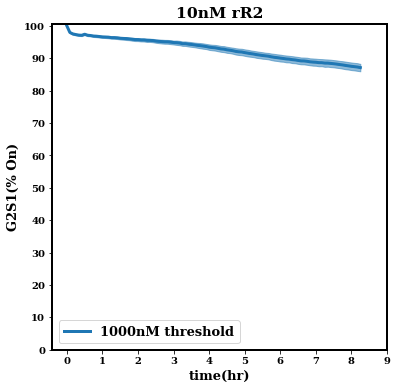

In [19]:
timestamps = np.arange(len(data))*5/60

plt.plot(timestamps, data.mean(axis = 1),\
                color = cm.colors[0], alpha = 1, label = "1000nM threshold")

plt.fill_between(timestamps, data.mean(axis = 1), data.mean(axis = 1) - data.std(axis = 1),\
                color = cm.colors[0], alpha = .5)

plt.fill_between(timestamps, data.mean(axis = 1), data.mean(axis = 1) + data.std(axis = 1),\
                color = cm.colors[0], alpha = .5)

plt.legend()
plt.xlabel("time(hr)", weight = "bold", fontsize = 13)
plt.ylabel("G2S1(% On)", weight = "bold", fontsize = 13)
plt.title("10nM rR2", weight = "bold")
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,110,10))
plt.savefig('Plots/1000nM Activity vs Time.png')
plt.show()

In [20]:
raw.to_csv("20221024-10nM-raw.csv")
raw.head(1)

,100nM-1,100nM-2,100nM-3,1000nM-1,1000nM-2,1000nM-3
0,8972.679424,9122.752004,9242.903415,7289.078604,7523.303463,7521.913891


In [21]:
raw.tail(1)

,100nM-1,100nM-2,100nM-3,1000nM-1,1000nM-2,1000nM-3
99,10522.665304,10668.427254,10856.652221,8289.937863,8567.38381,8724.441517


In [22]:
raw.head(1).mean(axis=1)

0    8278.7718
dtype: float64

In [23]:
raw.tail(1).mean(axis=1)

99    9604.917995
dtype: float64

In [24]:
norm.to_csv("20221024-10nM-norm.csv")
norm.head()

,100nM-1,100nM-2,100nM-3,1000nM-1,1000nM-2,1000nM-3
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,96.826122,96.588611,96.235682,98.245786,97.977375,97.731609
2,95.985985,95.778402,95.336530,97.854394,97.522721,97.211045
3,95.573289,95.288246,94.850124,97.658072,97.300198,97.035485
4,95.275799,94.988248,94.607990,97.490890,97.155352,96.850396


### Plotting
---

In [43]:
norm_100 = pd.read_csv("20220502-100nM-norm.csv", index_col= 0)
# norm_150 = pd.read_csv("20220509-150nM-norm.csv", index_col= 0)

# norm_05 = pd.read_csv("20220509-1.5nM-norm.csv", index_col= 0)
# norm_05 = pd.read_csv("20220509-1.5nM-norm.csv", index_col= 0)
# norm_05 = pd.read_csv("20220509-1.5nM-norm.csv", index_col= 0)

In [44]:
data = np.loadtxt("g1.txt")

extracted = []
for i in range(data.shape[0]):
    x, y = data[i, 0], data[i, 1]
    if abs(x) < 20 and abs(y) < 20:
        extracted.append(data[i, 2:])
        
g1 = []
a = np.array(extracted)
for i in range(a.shape[1]):
    g1.append(np.mean(a[:, i]))
    
data = np.loadtxt("rna.txt")

extracted = []
for i in range(data.shape[0]):
    x, y = data[i, 0], data[i, 1]
    if abs(x) < 20 and abs(y) < 20:
        extracted.append(data[i, 2:])
        
rna = []
a = np.array(extracted)
for i in range(a.shape[1]):
    rna.append(np.mean(a[:, i]))

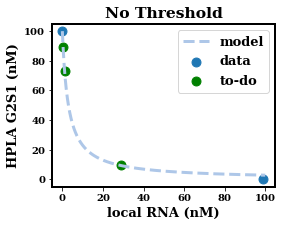

In [45]:
fig = plt.figure(figsize = (4, 3))

mg1 = np.load("0nMTh_G1.npy")
mrna = np.load("0nMTh_RNA.npy")
plt.plot(mrna, mg1, ls = "--", color = cm.colors[1], label = "model")
plt.scatter(rna[0], norm_100.iloc[0, 0:3].mean(), s = 80, color = cm.colors[0], label = "data") # 0nM
plt.scatter(rna[1], g1[1], s = 80, color = "green", label = "to-do") # 0.5nM
plt.scatter(rna[3], g1[3], s = 80, color = "green") # 1.5nM
plt.scatter(rna[8], g1[8], s = 80, color = "green") # 30nM
plt.scatter(rna[10], norm_100.iloc[-1, 0:3].mean(), s = 80, color = cm.colors[0]) # 100nM

plt.title("No Threshold", weight = "bold")
plt.xlabel("local RNA (nM)", weight = "bold")
plt.ylabel("HPLA G2S1 (nM)", weight = "bold")
plt.legend()
plt.savefig('Plots/0nM Activity vs Local RNA.png')
plt.show()

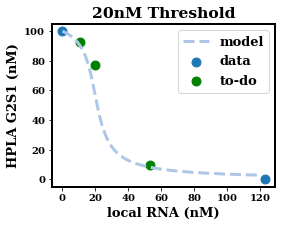

In [46]:
fig = plt.figure(figsize = (4, 3))

mg1 = np.load("20nMTh_G1.npy")
mrna = np.load("20nMTh_RNA.npy")
plt.plot(mrna, mg1, ls = "--", color = cm.colors[1], label = "model")
plt.scatter(rna[11], norm_100.iloc[0, 3:6].mean(), s = 80, color = cm.colors[0], label = "data") # 0nM
plt.scatter(rna[12], g1[12], s = 80, color = "green", label = "to-do") # 0.5nM
plt.scatter(rna[14], g1[14], s = 80, color = "green") # 1.5nM
plt.scatter(rna[19], g1[19], s = 80, color = "green") # 30nM
plt.scatter(rna[21], norm_100.iloc[-1, 3:6].mean(), s = 80, color = cm.colors[0]) # 100nM

plt.title("20nM Threshold", weight = "bold")
plt.xlabel("local RNA (nM)", weight = "bold")
plt.ylabel("HPLA G2S1 (nM)", weight = "bold")
plt.legend()
plt.savefig('Plots/20nM Activity vs Local RNA.png')
plt.show()

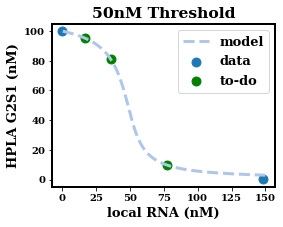

In [47]:
fig = plt.figure(figsize = (4, 3))

mg1 = np.load("50nMTh_G1.npy")
mrna = np.load("50nMTh_RNA.npy")
plt.plot(mrna, mg1, ls = "--", color = cm.colors[1], label = "model")
plt.scatter(rna[22], norm_100.iloc[0, 6:9].mean(), s = 80, color = cm.colors[0], label = "data") # 0nM
plt.scatter(rna[23], g1[23], s = 80, color = "green", label = "to-do") # 0.5nM
plt.scatter(rna[25], g1[25], s = 80, color = "green") # 1.5nM
plt.scatter(rna[30], g1[30], s = 80, color = "green") # 30nM
plt.scatter(rna[32], norm_100.iloc[-1, 6:9].mean(), s = 80, color = cm.colors[0]) # 100nM

plt.title("50nM Threshold", weight = "bold")
plt.xlabel("local RNA (nM)", weight = "bold")
plt.ylabel("HPLA G2S1 (nM)", weight = "bold")
plt.legend()
plt.savefig('Plots/50nM Activity vs Local RNA.png')
plt.show()

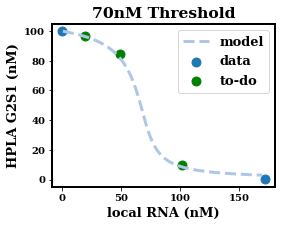

In [48]:
fig = plt.figure(figsize = (4, 3))

mg1 = np.load("70nMTh_G1.npy")
mrna = np.load("70nMTh_RNA.npy")
plt.plot(mrna, mg1, ls = "--", color = cm.colors[1], label = "model")
plt.scatter(rna[33], norm_100.iloc[0, 9:12].mean(), s = 80, color = cm.colors[0], label = "data") # 0nM
plt.scatter(rna[34], g1[34], s = 80, color = "green", label = "to-do") # 0.5nM
plt.scatter(rna[36], g1[36], s = 80, color = "green") # 1.5nM
plt.scatter(rna[41], g1[41], s = 80, color = "green") # 30nM
plt.scatter(rna[43], norm_100.iloc[-1, 9:12].mean(), s = 80, color = cm.colors[0]) # 100nM

plt.title("70nM Threshold", weight = "bold")
plt.xlabel("local RNA (nM)", weight = "bold")
plt.ylabel("HPLA G2S1 (nM)", weight = "bold")
plt.legend()
plt.savefig('Plots/70nM Activity vs Local RNA.png')
plt.show()

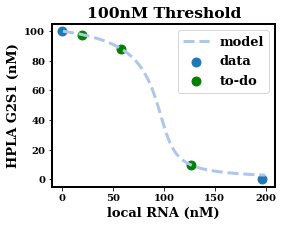

In [49]:
fig = plt.figure(figsize = (4, 3))

mg1 = np.load("100nMTh_G1.npy")
mrna = np.load("100nMTh_RNA.npy")
plt.plot(mrna, mg1, ls = "--", color = cm.colors[1], label = "model")
plt.scatter(rna[44], norm_100.iloc[0, 12:15].mean(), s = 80, color = cm.colors[0], label = "data") # 0nM
plt.scatter(rna[45], g1[45], s = 80, color = "green", label = "to-do") # 0.5nM
plt.scatter(rna[47], g1[47], s = 80, color = "green") # 1.5nM
plt.scatter(rna[52], g1[52], s = 80, color = "green") # 30nM
plt.scatter(rna[54], norm_100.iloc[-1, 12:15].mean(), s = 80, color = cm.colors[0]) # 100nM

plt.title("100nM Threshold", weight = "bold")
plt.xlabel("local RNA (nM)", weight = "bold")
plt.ylabel("HPLA G2S1 (nM)", weight = "bold")
plt.legend()
plt.savefig('Plots/100nM Activity vs Local RNA.png')
plt.show()